<a href="https://colab.research.google.com/github/aikssa/python_do_zero_ao_ds/blob/main/aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de preços de casas - Aula 02

# Importação das bibliotecas e dos dados

In [53]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image

In [2]:
# carregando o dataset
df = pd.read_csv('/content/drive/MyDrive/repos/python_zero_ds/datasets/kc_house_data.csv')

# verificando as 5 primeiras linhas do dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Tratamento dos dados

Ao analisarmos o dataframe, é possível verificar que, como o nome diz, os dados da coluna `date` são datas.

Contudo, se analisarmos os tipos dos dados, veremos que os elementos dessa coluna foram reconhecidos como `objetc`.

In [3]:
# verificando o tipo dos dados
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Nesse caso, se faz necessária a conversão da coluna para o tipo `date`. E é isso que faremos a seguir.

In [4]:
# convertendo os dados da coluna date de object para date
df['date'] = pd.to_datetime(df['date'])

# verificando o resultado
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [5]:
# visualizando o dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Respondendo questões de negócio

## Q1: Qual a data do imóvel mais antigo no portfólio?

In [6]:
df['date'].min()

Timestamp('2014-05-02 00:00:00')

**Resposta**: A data do imóvel mais antigo no portfólio, de acordo com a coluna `date`, é 02-05-2014.

## Q2: Quantos imóveis possuem o número máximo de andares?

In [7]:
# descobrindo qual é o número máximo de andares
df['floors'].max()

3.5

In [8]:
# verificando quantos imóveis possuem 3.5 andares
df[df['floors'] == 3.5].shape[0]

8

**Respostas**: 8 imóveis possuem o número máximo de andares.

## Q3: Criar uma classificação para os imóveis, separando-os em baixo e alto padrão de acordo com o preço.
- Acima de R$ 540.000 => alto padrão (high_standard)

- Abaixo de R$ 540.000 => baixo padrão (low_standard)

In [9]:
# criando uma nova coluna para classificar os imóveis
df['level'] = 'standard'

# atribuindo os valores de acordo com as condições
df.loc[df['price'] > 540000, 'level'] = 'high_standard'
df.loc[df['price'] < 540000, 'level'] = 'low_standard'

# verificando o resultado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low_standard
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low_standard
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,low_standard


In [10]:
# verificando percentualmente quantos imóveis existem em cada tipo
df['level'].value_counts() / df.shape[0] * 100

low_standard     62.999121
high_standard    36.639985
standard          0.360894
Name: level, dtype: float64

## Q4: Gostaria de um relatório ordenado pelo preço e contendo as seguintes informações: id do imóvel, data que o imóvel ficou disponível para compra, o número de quartos, o tamanho total do terreno, o preço, a classificação do imóvel (alto e baixo padrão)

In [11]:
# selecionando as colunas de interesse e ordenando pelo preço
df_relatorio = df[['id', 'date', 'bedrooms', 'sqft_lot', 'price', 'level']].sort_values('price', ascending=False)

# verificando o resultado
df_relatorio.head()

,id,date,bedrooms,sqft_lot,price,level
7252,6762700020,2014-10-13,6,27600,7700000.0,high_standard
3914,9808700762,2014-06-11,5,37325,7062500.0,high_standard
9254,9208900037,2014-09-19,6,31374,6885000.0,high_standard
4411,2470100110,2014-08-04,5,35069,5570000.0,high_standard
1448,8907500070,2015-04-13,5,23985,5350000.0,high_standard


In [12]:
# gerando o relatorio em um arquivo csv
# a inclusão do parâmetro index=False reseta o índice
df_relatorio.to_csv('/content/drive/MyDrive/repos/python_zero_ds/datasets/relatorio_aula02.csv', index=False)

## Q5: Gostaria de um mapa indicando onde as casas estão localizadas geograficamente

Para plotar o gráfico, utilizaremos a biblioteca [Plotly](https://plotly.com/).

In [13]:
# selecionando as colunas necessárias para plotar o mapa
df_mapa_rosa = df[['id', 'price', 'lat', 'long']]

# criando o mapa
mapa_rosa = px.scatter_mapbox(data_frame=df_mapa_rosa,
                         lat='lat',
                         lon='long',
                         hover_name='id',
                         hover_data=['price'],
                         color_discrete_sequence=['fuchsia'],
                         mapbox_style='open-street-map',
                         height=600)

# definindo as margens do mapa
mapa_rosa.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})

# plotando o gráfico
mapa_rosa.show()

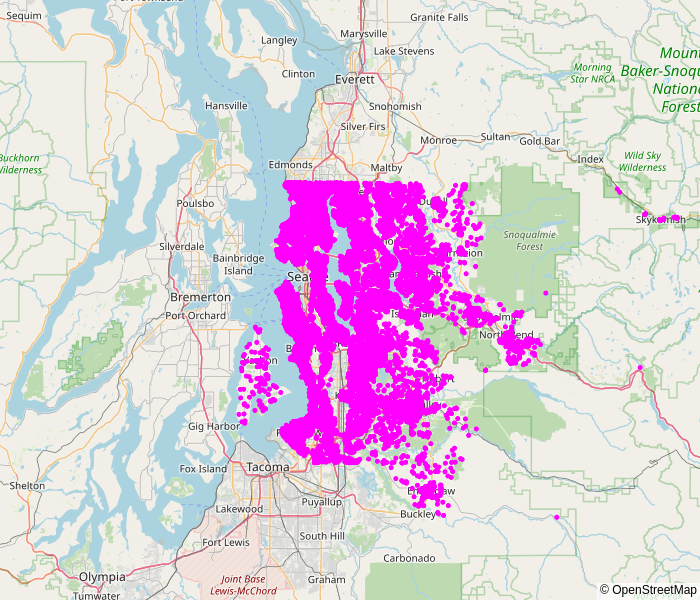

In [54]:
Image('/content/drive/MyDrive/repos/python_zero_ds/datasets/mapa_house_rocket.png')

In [14]:
# salvando o mapa em html
mapa_rosa.write_html('/content/drive/MyDrive/repos/python_zero_ds/datasets/mapa_house_rocket.html')

## Q6: Crie uma nova coluna chamada: "house_age"
- Se o valor da coluna "date" for maior que 2014-01-01 => 'new_house
- Se o valor da coluna "date" for menor que 2014-01-01 => 'old_house

In [15]:
# criando uma nova coluna
df['house_age'] = 'regular'

# atribuindo os valores de acordo com as condições
df.loc[df['date'] > '2014-01-01', 'house_age'] = 'new_house'
df.loc[df['date'] < '2014-01-01', 'house_age'] = 'old_house'

# verificando o resultado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low_standard,new_house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard,new_house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low_standard,new_house
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard,new_house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,low_standard,new_house


In [16]:
# verificando a quantidade de casas novas e antigas
df['house_age'].value_counts()

new_house    21613
Name: house_age, dtype: int64

Aqui é interessante perceber que não existe nenhuma casa na coluna `date` com data anterior à 01/01/2014 e, portanto, todas foram classificadas como novas.

## Q7: Crie uma nova coluna chamada: "dormitory_type"
- Se o valor da coluna "bedrooms" for igual à 1 => 'studio'
- Se o valor da coluna "bedrooms" for igual à 2 => 'apartament'
- Se o valor da coluna "bedrooms" for maior que 2 => 'house'

In [17]:
# criando uma nova coluna
df['dormitory_type'] = 'no_bedroom'

# atribuindo os valores de acordo com as condições
df.loc[df['bedrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[df['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
df.loc[df['bedrooms'] > 2, 'dormitory_type'] = 'house'

# verificando o resultado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,house_age,dormitory_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low_standard,new_house,house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard,new_house,house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low_standard,new_house,apartament
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard,new_house,house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,low_standard,new_house,house


In [18]:
# verificando a quantidade de imóveis em cada tipo de dormitório
df['dormitory_type'].value_counts()

house         18641
apartament     2760
studio          199
no_bedroom       13
Name: dormitory_type, dtype: int64

In [19]:
# verificando percentualmente a quantidade de imóveis em cada tipo de dormitório
df['dormitory_type'].value_counts() / df.shape[0] * 100

house         86.249017
apartament    12.770092
studio         0.920742
no_bedroom     0.060149
Name: dormitory_type, dtype: float64

## Q8: Crie uma nova coluna chamada: "condition_type"
- Se o valor da coluna "condition" for menor ou igual à 2 => 'bad'
- Se o valor da coluna "condition" for igual à 3 ou 4 => 'regular'
- Se o valor da coluna "condition" for igual à 5 => 'good'

In [20]:
# criando uma nova coluna
df['condition_type'] = ''

# atribuindo os valores de acordo com as condições
df.loc[df['condition'] <= 2, 'condition_type'] = 'bad'
df.loc[(df['condition'] == 3) | (df['condition'] == 4), 'condition_type'] = 'regular'
df.loc[df['condition'] == 5, 'condition_type'] = 'good'

# verificando o resultado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,house_age,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low_standard,new_house,house,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard,new_house,house,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low_standard,new_house,apartament,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard,new_house,house,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,low_standard,new_house,house,regular


In [21]:
# verificando a quantidade de imóveis pela condição
df['condition_type'].value_counts()

regular    19710
good        1701
bad          202
Name: condition_type, dtype: int64

In [22]:
# verificando percentualmente a quantidade de imóveis pela condição
df['condition_type'].value_counts() / df.shape[0] * 100

regular    91.195114
good        7.870263
bad         0.934623
Name: condition_type, dtype: float64

## Q9: Modifique o TIPO da coluna "condition" para STRING

In [23]:
# verificando o tipo da coluna condition
df['condition'].dtype

dtype('int64')

In [24]:
# modificando o tipo da coluna
df['condition'] = df['condition'].astype(str)

# verificando o resultado
df['condition'].dtype

dtype('O')

## Q10: Delete as colunas "sqft_living15" e "sqft_lot15"

In [25]:
# verificando as colunas existentes
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'level', 'house_age',
       'dormitory_type', 'condition_type'],
      dtype='object')

In [26]:
# deletando as colunas
df.drop(labels=['sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

# verificando o resultado
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'level', 'house_age', 'dormitory_type',
       'condition_type'],
      dtype='object')

## Q11: Modifique o TIPO da coluna "yr_built" para DATE

In [27]:
# verificando o tipo da coluna
df['yr_built'].dtype

dtype('int64')

In [28]:
# modificando o tipo da coluna
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y', errors='coerce')

# verificando o resultado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,house_age,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955-01-01,0,98178,47.5112,-122.257,low_standard,new_house,house,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951-01-01,1991,98125,47.7210,-122.319,low_standard,new_house,house,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933-01-01,0,98028,47.7379,-122.233,low_standard,new_house,apartament,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965-01-01,0,98136,47.5208,-122.393,high_standard,new_house,house,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987-01-01,0,98074,47.6168,-122.045,low_standard,new_house,house,regular


In [29]:
# verificando o tipo da coluna
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

## Q12: Modifique o TIPO da coluna "yr_renovated" para DATE

In [30]:
# verificando o tipo da coluna 
df['yr_renovated'].dtype

dtype('int64')

In [31]:
# modificando o tipo da coluna
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y', errors='coerce')

# verificando o resultado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,house_age,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955-01-01,NaT,98178,47.5112,-122.257,low_standard,new_house,house,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951-01-01,1991-01-01,98125,47.7210,-122.319,low_standard,new_house,house,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933-01-01,NaT,98028,47.7379,-122.233,low_standard,new_house,apartament,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965-01-01,NaT,98136,47.5208,-122.393,high_standard,new_house,house,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987-01-01,NaT,98074,47.6168,-122.045,low_standard,new_house,house,regular


In [32]:
# verificando o tipo da coluna
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated      datetime64[ns]
zipcode                    int64
lat                      float64
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object

## Q13: Qual a data mais antiga de construção de um imóvel?

In [33]:
# verificando a data mais antiga da construção
df['yr_built'].min()

Timestamp('1900-01-01 00:00:00')

**Resposta**: A data mais antiga de construção de um imóvel é 1900.

## Q14: Qual a data mais antiga de renovação de um imóvel?

In [34]:
# verificando a data mais antiga de renovação de um imóvel
df['yr_renovated'].min()

Timestamp('1934-01-01 00:00:00')

**Resposta**: A data mais antiga de renovação de um imóvel é 1934.

## Q15: Quantos imóveis tem 2 andares?

In [35]:
# verificando quantos imóveis possuem 2 andares
df[df['floors'] == 2].shape[0]

8241

**Resposta**: 8241 imóveis possuem 2 andares.

## Q16: Quantos imóveis estão com a condição igual à "regular"?

In [36]:
df[df['condition_type'] == 'regular'].shape[0]

19710

**Resposta**: 19710 imóveis estão com a condição igual à 'regular'.

## Q17: Quantos imóveis estão com a condição igual a "bad" e possuem "vista para água"?

In [37]:
# verificando quantos imóveis estão com a condição bad e possuem vista para a água
df[(df['condition_type'] == 'bad') & (df['waterfront'] == 1)].shape[0]

2

**Resposta**: 2 imóveis estão com a condição `bad` e possuem vista para a água.

## Q18: Quantos imóveis estão com a condição igual a "good" e são "new_house"?

In [38]:
# verificando quantos imóveis estão com a condição good e são new house
df[(df['condition_type'] == 'good') & (df['house_age'] == 'new_house')].shape[0]

1701

**Resposta**: 1701 imóveis estão com a condição `good` e são `new_house`.

## Q19: Qual o valor do imóvel mais caro do tipo "studio"?

In [39]:
# verificando o imóvel mais caro do tipo studio
df['price'].loc[df['dormitory_type'] == 'studio'].max()

1247000.0

**Resposta**: O valor do imóvel mais caro é $ 1.247.000,00.

## Q20: Quantos imóveis do tipo "apartament" foram reformados em 2015?

In [40]:
# verificando quantos imóveis apartament foram reformados em 2015
df[(df['dormitory_type'] == 'apartament') & (df['yr_renovated'] == '2015-01-01')].shape[0]

0

**Resposta**: Nenhum imóvel do tipo `apartament` foi reformado em 2015.

## Q21: Qual o maior número de quartos que um imóvel do tipo "house" possui?

In [41]:
# verificando o maior número de quartos que um imóvel house possui
df['bedrooms'].loc[df['dormitory_type'] == 'house'].max()

33

**Resposta**: O maior número de quartos que um imóvel do tipo `house` possui é 33.

## Q22: Quantos imóveis "new_house" foram reformados no ano de 2014?

In [42]:
# verificando quantos imóveis new house foram reformados em 2014
df[(df['house_age'] == 'new_house') & (df['yr_renovated'] == '2014-01-01')].shape[0]

91

**Resposta**: 91 imóveis `new_house` foram reformados em 2014.

## Q23: Selecione as colunas: "id", "date", "price", "floors", "zipcode" pelos métodos:

- Direto pelo nome das colunas

In [43]:
# selecionando as colunas pelos nomes
df[['id', 'date', 'price', 'floors', 'zipcode']].head()

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074


- Pelos índices

In [44]:
# selecionando as colunas pelos índices
df.iloc[:5, [0, 1, 2, 7, 16]]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074


- Pelos índices das linhas e o nome das colunas

In [45]:
# selecionando as colunas pelo índice das linhas e o nome das colunas
df.loc[:5, ['id', 'date', 'price', 'floors', 'zipcode']]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074
5,7237550310,2014-05-12,1225000.0,1.0,98053


- Índices booleanos

In [46]:
# selecionando as colunas pelos índices booleanos
df.loc[:5, [True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False]]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074
5,7237550310,2014-05-12,1225000.0,1.0,98053


## Q24: Salve um arquivo .csv com somente as colunas dos itens 10 ao 17

In [47]:
# selecionando apenas as colunas dos itens 10 ao 17
df_cols = df.iloc[:, 10:18]

# verificando o resultado
df_cols.head()

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,3,7,1180,0,1955-01-01,NaT,98178,47.5112
1,3,7,2170,400,1951-01-01,1991-01-01,98125,47.7210
2,3,6,770,0,1933-01-01,NaT,98028,47.7379
3,5,7,1050,910,1965-01-01,NaT,98136,47.5208
4,3,8,1680,0,1987-01-01,NaT,98074,47.6168


In [48]:
# salvando os dados em um arquivo csv
df_cols.to_csv('/content/drive/MyDrive/repos/python_zero_ds/datasets/colunas.csv')

## Q25: Modifique a cor dos pontos no mapa de "pink" para "verde-escuro"

In [49]:
# selecionando as colunas necessárias
df_mapa_verde = df[['id', 'price', 'lat', 'long']]

# criando o mapa
mapa_verde = px.scatter_mapbox(data_frame=df_mapa_verde,
                               lat='lat',
                               lon='long',
                               hover_name='id',
                               hover_data=['price'],
                               color_discrete_sequence=['darkgreen'],
                               mapbox_style='open-street-map',
                               height=600)

# definindo as margens do mapa
mapa_verde.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})

# plotando o mapa
mapa_verde.show()

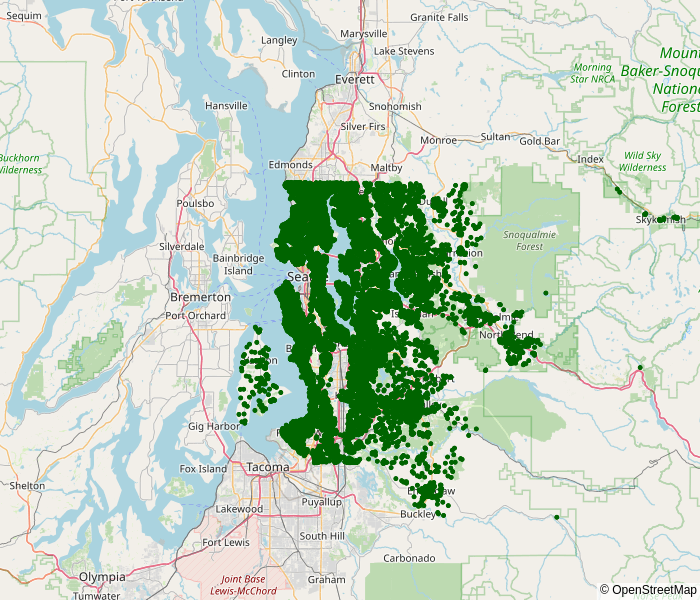

In [55]:
Image('/content/drive/MyDrive/repos/python_zero_ds/datasets/mapa_verde.png')

In [50]:
# salvando o mapa em html
mapa_verde.write_html('/content/drive/MyDrive/repos/python_zero_ds/datasets/mapa_verde.html')